In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
import numpy as np
import joblib

X_test_path = '/home/basir/basir/Dominant_Recombination/dataset_labelsX_test.npy'
y_test_path = '/home/basir/basir/Dominant_Recombination/dataset_labelsy_test.npy'

# Load the saved NumPy arrays
X_test = np.load(X_test_path)
y_test = np.load(y_test_path)

# Load your final model
final_model_path = "/home/basir/Stack18LRrf_classifier/final_modeljob.joblib"
final_model = joblib.load(final_model_path)

# Make predictions on the test set
y_pred = final_model.predict(X_test)



# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred)

# Calculate Sensitivity, Specificity, and MCC for each class
sensitivity = []
specificity = []
mcc_per_class = []
for i in range(conf_mat.shape[0]):
    tp = conf_mat[i, i]
    fn = np.sum(conf_mat[i, :]) - tp
    fp = np.sum(conf_mat[:, i]) - tp
    tn = np.sum(conf_mat) - (tp + fn + fp)
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    mcc_per_class.append(matthews_corrcoef(y_test == i, y_pred == i))

# Calculate final test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print evaluation scores for the final model
print(f"Final Model: MCC = {mcc:.2f}, Test Accuracy = {test_accuracy:.2f}")
for i in range(len(sensitivity)):
    print(f"Class {i}: Sensitivity = {sensitivity[i]:.2f}, Specificity = {specificity[i]:.2f}, MCC = {mcc_per_class[i]:.4f}")

Final Model: MCC = 0.91, Test Accuracy = 0.94
Class 0: Sensitivity = 0.97, Specificity = 0.98, MCC = 0.9547
Class 1: Sensitivity = 0.97, Specificity = 0.95, MCC = 0.9098
Class 2: Sensitivity = 0.88, Specificity = 0.97, MCC = 0.8649


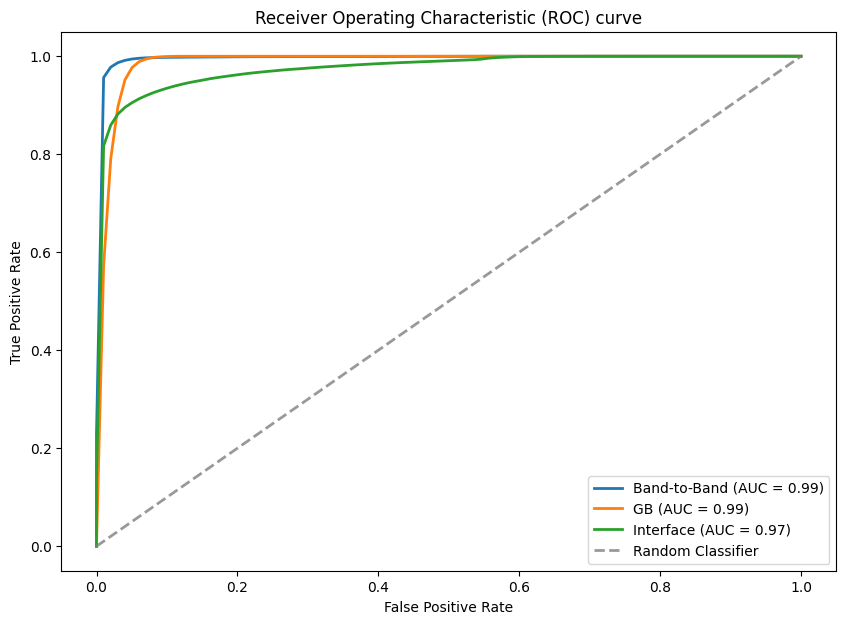

In [5]:
from sklearn.metrics import matthews_corrcoef, confusion_matrix, accuracy_score, roc_curve, auc, classification_report
# Initialize variables to store mean ROC curves for all folds
mean_fpr = np.linspace(0, 1, 100)

# Plot mean ROC curves for each class
plt.figure(figsize=(10, 7))

# Plot ROC curves and calculate mean AUC for each class
for i, class_label in enumerate(['Band-to-Band', 'GB', 'Interface']):
    tprs_class = []
    for j in range(7):
        y_score = final_model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_score[:, i], pos_label=i)
        tprs_class.append(np.interp(mean_fpr, fpr, tpr))

    mean_tpr = np.mean(tprs_class, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot([0] + mean_fpr.tolist(), [0] + mean_tpr.tolist(), linewidth=2, label=f"{class_label} (AUC = {mean_auc:.2f})")
# Plot random classifier
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', alpha=0.8, label='Random Classifier')    
# Add legend and labels
plt.legend(loc='lower right', fontsize=10)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')

plt.show()

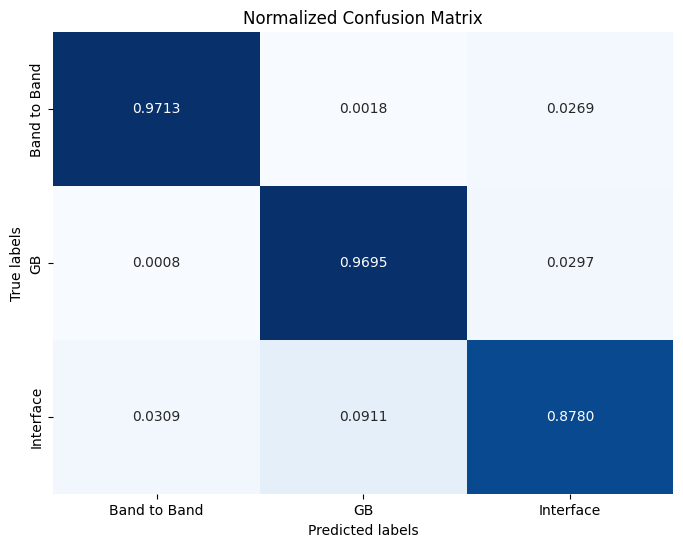

In [6]:
# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Define class names
class_names = ['Band to Band', 'GB', 'Interface']

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Calculate normalized confusion matrix
normalized_conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix for the final model
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_mat, annot=True, fmt=".4f", cmap='Blues', cbar=False)

# Set class labels for both axes at the center of each cell
plt.xticks(np.arange(len(class_names)) + 0.5, class_names, ha='center')
plt.yticks(np.arange(len(class_names)) + 0.5, class_names, va='center')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix')
plt.savefig('NCF.png', dpi=300)
plt.show()


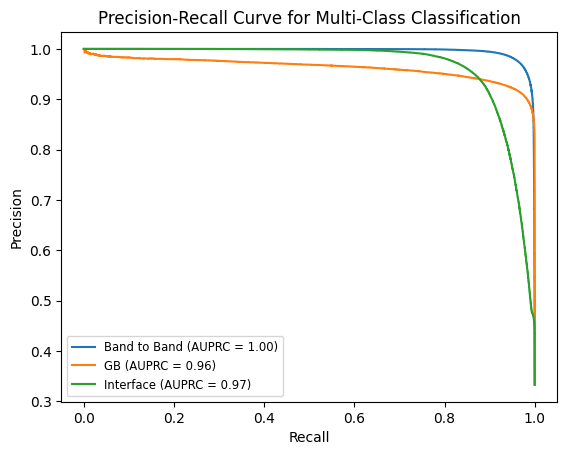

In [10]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Make predictions on the test data
y_scores = final_model.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Binarize with classes [0, 1, 2]

# Calculate precision and recall for each class
precision = dict()
recall = dict()
auc_score = dict()

class_labels = {0: 'Band to Band', 1: 'GB', 2: 'Interface'}

for i in range(3):  # Loop over 3 classes
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    auc_score[i] = auc(recall[i], precision[i])

    # Plot precision-recall curve for each class with corresponding label
    plt.plot(recall[i], precision[i], label=f'{class_labels[i]} (AUPRC = {auc_score[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-Class Classification')
plt.legend(loc='lower left', fontsize='small')
plt.grid(False)
plt.show()
